In [1]:


type Agent{TI<:Integer, TF<:AbstractFloat}
    kind::TI
    location::Vector{TF}
end


#goddamnit this is so annoying. I'm jus goingto run this here at the start
#so it is run and then the rest can just sort itself out

# holy crap! once we sorted that, it worked!!! I've actually implemented Schellings
#model in julia!!! that's really great!

In [6]:
#okay, this is following the quantitive econ course on the schelling model
# should be fun to try implementing this briefly
#more fun than my phd work i'm procrastinating out of anyhow!
using Plots
#using PyPlot
pyplot()
#ioff() # necessary for inline plotting
srand(42) # set the seed for random numbers so wecan have reproducible output

LoadError: UndefVarError: ioff not defined


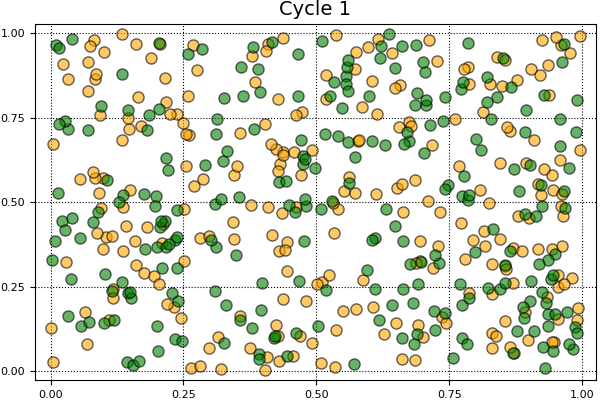

Entering loop 1



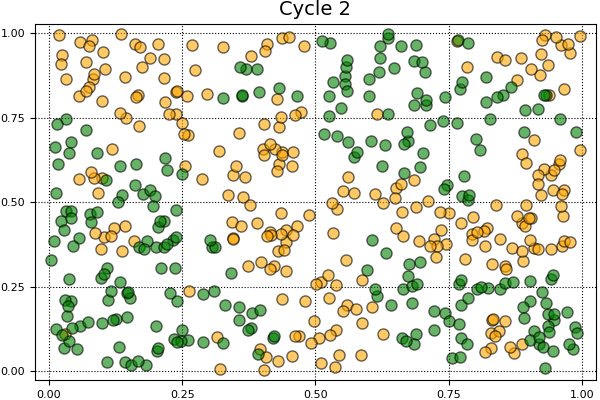

Entering loop 2



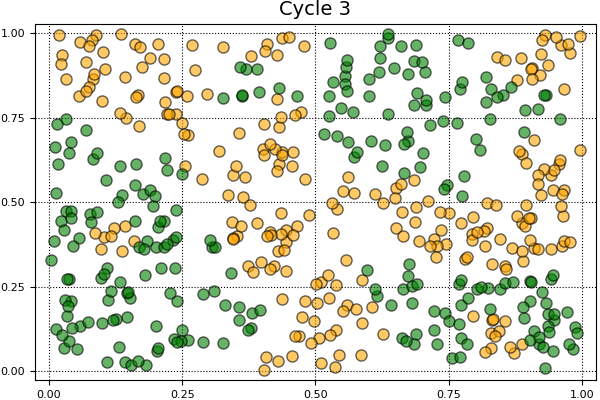

Entering loop 3



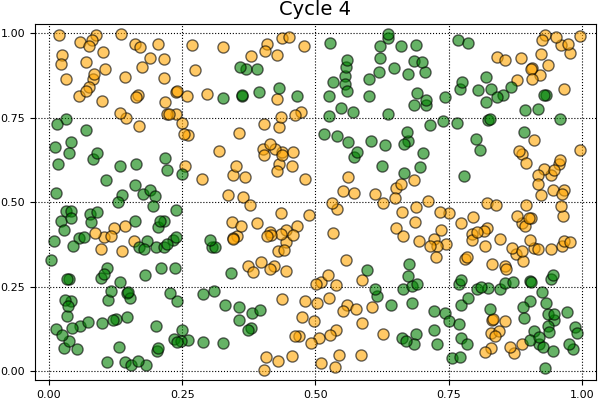

Entering loop 4
Converged, terminating


In [5]:

# constructor
Agent(k::Integer) = Agent(k, rand(2))


function draw_location!(a::Agent)
    a.location = rand(2)
    nothing
end

# distance is just 2 norm: uses our subtraction function
get_distance(a::Agent, o::Agent) = norm(a.location - o.location)

function is_happy(a::Agent, others::Vector{Agent})
    "True if sufficient number of nearest neighbors are of the same type."
    # distances is a list of pairs (d, agent), where d is distance from
    # agent to self
    distances = Any[]

    for agent in others
        if a != agent
            dist = get_distance(a, agent)
            push!(distances, (dist, agent))
        end
    end

    # == Sort from smallest to largest, according to distance == #
    sort!(distances)

    # == Extract the neighboring agents == #
    neighbors = [agent for (d, agent) in distances[1:num_neighbors]]

    # == Count how many neighbors have the same type as self == #
    num_same_type = sum([a.kind == other.kind for other in neighbors])

    return num_same_type >= require_same_type
end

function update!(a::Agent, others::Vector{Agent})
    "If not happy, then randomly choose new locations until happy."
    while !is_happy(a, others)
        draw_location!(a)
    end
    return nothing
end


function plot_distribution(agents::Vector{Agent}, cycle_num)
    x_vals_0, y_vals_0 = Float64[], Float64[]
    x_vals_1, y_vals_1 = Float64[], Float64[]

    # == Obtain locations of each type == #
    for agent in agents
        x, y = agent.location
        if agent.kind == 0
            push!(x_vals_0, x)
            push!(y_vals_0, y)
        else
            push!(x_vals_1, x)
            push!(y_vals_1, y)
        end
    end

    p = scatter(x_vals_0, y_vals_0, color=:orange, markersize=8, alpha=0.6)
    scatter!(x_vals_1, y_vals_1, color=:green, markersize=8, alpha=0.6)
    plot!(title="Cycle $(cycle_num)", legend=:none)

    return p
end;

# == Main == #

num_of_type_0 = 250
num_of_type_1 = 250
num_neighbors = 10      # Number of agents regarded as neighbors
require_same_type = 5   # Want at least this many neighbors to be same type

# == Create a list of agents == #
agents = Agent[Agent(0) for i in 1:num_of_type_0]
push!(agents, [Agent(1) for i in 1:num_of_type_1]...)

count = 1

# ==  Loop until none wishes to move == #
while true
    println("Entering loop $count")
    p = plot_distribution(agents, count)
    display(p)
    count += 1
    no_one_moved = true
    movers = 0
    for agent in agents
        old_location = agent.location
        update!(agent, agents)
        if !isapprox(0.0, maximum(old_location - agent.location))
            no_one_moved = false
        end
    end
    if no_one_moved
        break
    end
end

println("Converged, terminating")
#workspace()


In [17]:
# our main functoin, where we ste up variables and run the mode

num_type_0 = 250
num_type_1 = 250
num_neighbours = 10
require_same_type=5

#create a list of agents
agents = Agent[Agent(0) for i in 1:num_type_0]
push!(agents,[Agent(1) for i in 1:num_type_1]...)

count = 1

# loop until none wish to move
while true
    println("Entering loop $count")
    p = plot_distribution(agents, count)
    display(p)
    count +=1
    no_one_moved=true
    movers = 0
    for agent in agents
        old_location = agent.location
        update!(agent, agents)
        if !isapprox(0.0, maximum(old_location-agent.location))
            no_one_moved = false
        end
    end
    if no_one_moved
        break
    end
end
println("Converged, terminating")

workspace()

Entering loop 1


LoadError: MethodError: no method matching colon(::ColorTypes.#color, ::ColorTypes.#green)[0m
Closest candidates are:
  colon{T}(::T, ::Any, [1m[31m::T[0m) at range.jl:118
  colon{T<:Real}([1m[31m::T<:Real[0m, ::Any, [1m[31m::T<:Real[0m) at range.jl:114
  colon{A<:Real,C<:Real}([1m[31m::A<:Real[0m, ::Any, [1m[31m::C<:Real[0m) at range.jl:112
  ...[0m